In [27]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("2023_global_country_development_and_prosperity_index/data.csv")

In [29]:
print(df.columns)
print(df.head())

# Assuming the country column is named "Country"
country_column = "Country"  # Adjust this if the column name is different

# Remove leading and trailing spaces from country names
df[country_column] = df[country_column].str.strip()

# Set the country column as the index
df.set_index(country_column, inplace=True)

# Verify the index is set correctly
print(df.index)

# Now try to access the row for "Norway"
try:
    norway_data = df.loc["Norway"]
    print(norway_data)
except KeyError:
    print("KeyError: 'Norway' not found in the DataFrame. Please check the country names.")

Index(['Country', 'AveragScore', 'SafetySecurity', 'PersonelFreedom',
       'Governance', 'SocialCapital', 'InvestmentEnvironment',
       'EnterpriseConditions', 'MarketAccessInfrastructure', 'EconomicQuality',
       'LivingConditions', 'Health', 'Education', 'NaturalEnvironment'],
      dtype='object')
         Country  AveragScore  SafetySecurity  PersonelFreedom  Governance  \
0        Denmark        84.55           92.59            94.09       89.45   
1         Sweden        83.67           90.97            91.90       86.41   
2         Norway        83.59           93.30            94.10       89.66   
3        Finland        83.47           89.56            91.96       90.41   
4    Switzerland        83.42           95.66            87.50       87.67   

   SocialCapital  InvestmentEnvironment  EnterpriseConditions  \
0          82.56                  82.42                 79.64   
1          78.29                  82.81                 75.54   
2          79.03            

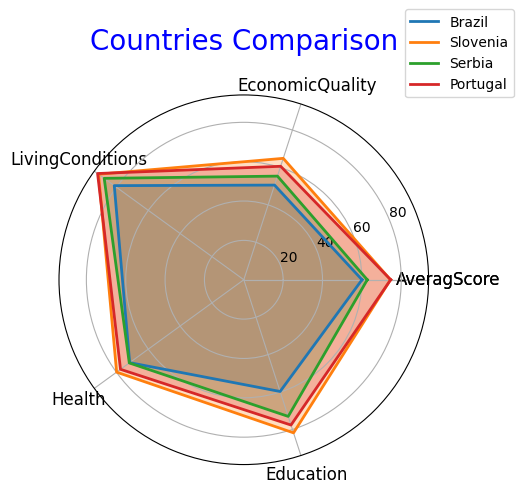

In [31]:
categories = ['AveragScore', 'EconomicQuality', 'LivingConditions', 'Health', 'Education']

brazil = []
slovenia = []
serbia = []
portugal = []

for category in categories:
    brazil.append(df.loc["Brazil"][category])
    slovenia.append(df.loc["Slovenia"][category])
    serbia.append(df.loc["Serbia"][category])
    portugal.append(df.loc["Portugal"][category])

brazil.append(brazil[0])

slovenia.append(slovenia[0])

serbia.append(serbia[0])

portugal.append(portugal[0])

categories.append(categories[0])
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))

ax = plt.subplot(polar=True)

# Plot each country's data
ax.plot(label_loc, brazil, label='Brazil', linewidth=2)
ax.fill(label_loc, brazil, alpha=0.25)
ax.plot(label_loc, slovenia, label='Slovenia', linewidth=2)
ax.fill(label_loc, slovenia, alpha=0.25)
ax.plot(label_loc, serbia, label='Serbia', linewidth=2)
ax.fill(label_loc, serbia, alpha=0.25)
ax.plot(label_loc, portugal, label='Portugal', linewidth=2)
ax.fill(label_loc, portugal, alpha=0.25)

# Title and labels
plt.title('Countries Comparison', size=20, color='blue', y=1.1)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories, fontsize=12)

# Improve readability
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.25))